In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])


def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

W = np.random.randn(X.shape[1])

def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            err = calc_mse(y, np.dot(X, W))
            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [2]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
    
    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    #print(W)
    return W

0 -- coeff: [56.47, 6.19, 0.15, 6.16]
1 -- coeff: [56.46, 6.21, 0.05, 6.24]
2 -- coeff: [56.45, 6.2, 0.12, 6.19]
3 -- coeff: [56.44, 6.2, 0.12, 6.18]
4 -- coeff: [56.43, 6.17, 0.22, 6.1]
5 -- coeff: [56.41, 6.17, 0.26, 6.07]
6 -- coeff: [56.38, 6.17, 0.2, 6.12]
7 -- coeff: [56.35, 6.16, 0.24, 6.09]
8 -- coeff: [56.32, 6.15, 0.25, 6.08]
9 -- coeff: [56.27, 6.14, 0.29, 6.05]
10 -- coeff: [56.21, 6.15, 0.23, 6.1]
11 -- coeff: [56.13, 6.13, 0.27, 6.06]
12 -- coeff: [56.03, 6.12, 0.27, 6.07]
13 -- coeff: [55.91, 6.07, 0.4, 5.96]
14 -- coeff: [55.75, 6.04, 0.5, 5.89]
15 -- coeff: [55.56, 6.02, 0.51, 5.88]
16 -- coeff: [55.31, 5.97, 0.58, 5.82]
17 -- coeff: [55.01, 5.9, 0.75, 5.7]
18 -- coeff: [54.62, 5.84, 0.87, 5.6]
19 -- coeff: [54.15, 5.76, 1.01, 5.49]
20 -- coeff: [53.56, 5.65, 1.25, 5.3]
21 -- coeff: [52.83, 5.55, 1.39, 5.19]
22 -- coeff: [51.94, 5.42, 1.58, 5.04]
23 -- coeff: [50.85, 5.28, 1.79, 4.85]
24 -- coeff: [49.54, 5.12, 1.98, 4.68]
25 -- coeff: [47.97, 4.94, 2.17, 4.5]
26 -- co

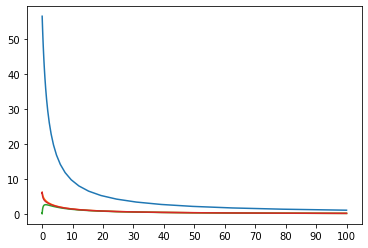

In [10]:
alpha_list = np.logspace(-3, 2, 50)
coeff = np.zeros((50, X_st.shape[1]))

for i, val in enumerate(alpha_list):
    coeff[i, :] = gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg=val)
    out = [round(num, 2) for num in coeff[i]]    
    print(f'{i} -- coeff: {out}')
    
plt.plot(alpha_list, coeff)
plt.xticks(np.arange(0, 101, 10))
plt.show()


чем сильнее регуляризация, тем меньше веса.

# задание 2

In [32]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
    #    if i % (iterations / 10) == 0:
     #       print(f'Iter: {i}, weights: {W}, error {err}')
    
  #  print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

0 -- coeff: [56.5, 6.2, 0.11, 6.19]
1 -- coeff: [56.5, 6.18, 0.25, 6.07]
2 -- coeff: [56.5, 6.22, 0.03, 6.26]
3 -- coeff: [56.5, 6.2, 0.14, 6.16]
4 -- coeff: [56.5, 6.21, 0.06, 6.23]
5 -- coeff: [56.5, 6.19, 0.14, 6.16]
6 -- coeff: [56.5, 6.19, 0.18, 6.13]
7 -- coeff: [56.5, 6.2, 0.12, 6.18]
8 -- coeff: [56.5, 6.17, 0.25, 6.08]
9 -- coeff: [56.5, 6.22, -0.0, 6.28]
10 -- coeff: [56.49, 6.18, 0.21, 6.1]
11 -- coeff: [56.49, 6.19, 0.12, 6.18]
12 -- coeff: [56.49, 6.21, 0.06, 6.22]
13 -- coeff: [56.49, 6.15, 0.3, 6.03]
14 -- coeff: [56.49, 6.16, 0.26, 6.06]
15 -- coeff: [56.48, 6.22, -0.0, 6.28]
16 -- coeff: [56.48, 6.16, 0.28, 6.04]
17 -- coeff: [56.47, 6.21, 0.0, 6.28]
18 -- coeff: [56.47, 6.16, 0.21, 6.09]
19 -- coeff: [56.46, 6.13, 0.33, 5.99]
20 -- coeff: [56.45, 6.13, 0.31, 5.99]
21 -- coeff: [56.43, 6.11, 0.37, 5.93]
22 -- coeff: [56.41, 6.15, 0.11, 6.14]
23 -- coeff: [56.39, 6.11, 0.28, 5.98]
24 -- coeff: [56.36, 6.13, 0.1, 6.11]
25 -- coeff: [56.32, 6.11, 0.09, 6.1]
26 -- coeff: [

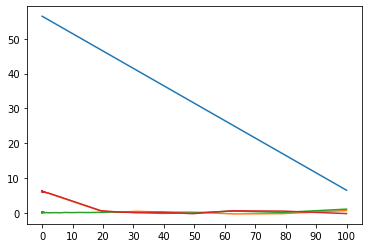

In [33]:
alpha_list = np.logspace(-3, 2, 50)
coeff = np.zeros((50, X_st.shape[1]))

for i, val in enumerate(alpha_list):
    coeff[i, :] = gradient_descent_reg_l1(X_st, y, iterations=1000, eta=1e-2, reg=val)
    out = [round(num, 2) for num in coeff[i]]    
    print(f'{i} -- coeff: {out}')
    
plt.plot(alpha_list, coeff)
plt.xticks(np.arange(0, 101, 10))
plt.show()


# 3

In [ ]:
Нормализацию удобно использовать, когда распределение данных не соответствует распределению Гаусса. 
Это может быть полезно в алгоритмах, которые не предполагают никакого распределения данных.
Стандартизация может быть полезна в случаях, когда данные соответствуют гауссовскому распределению. 
Однако, это не обязательно. В отличие от нормализации, стандартизация не имеет ограничивающего диапазона. 
Таким образом, даже если в ваших данных есть выбросы, на них не повлияет стандартизация.
Выбор использования нормализации или стандартизации будет зависеть от вашей проблемы и алгоритма машинного обучения,
который вы используете. Не существует жесткого правила, которое подскажет, когда нормализовать или стандартизировать данные.

# 4

In [172]:
from sklearn import datasets
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

X_4, Y_4, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X_4[:, 0] *= 10

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st_4 = X_4.copy().astype(np.float64)
X_st_4[:, 1] = standard_scale(X_st_4[:, 1])



def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

W = np.random.randn(X_4.shape[1])

def gradient_descent_errors(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = [None] * iterations;
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors[i] = err
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return errors

def stohastic_gradient_descent_errors(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
    
    iter_count = 0
        
    for i in range(0, iterations):
        for b in range(n_batch):
            iter_count += 1
            start = batch_size * b
            end = batch_size * (b + 1)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            err = calc_mse(y, np.dot(X, W))
            errors.append(err)
            if iter_count >= iterations: # workaround to don't rewrite whole algorithm
                return errors;
                
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
    
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    return errors

max_iter = 1500

In [173]:
GD_errors = gradient_descent_errors(X_st_4, Y_4, iterations=max_iter, eta=1e-2)
GD_errors

Iter: 0, weights: [10.87398915  2.44999446], error 6933.20529872385
Iter: 150, weights: [ 6.21890998 64.50807042], error 38.84314307719174
Iter: 300, weights: [ 6.22112908 67.51004917], error 28.508984730286247
Iter: 450, weights: [ 6.22148091 67.65529246], error 28.48480033483399
Iter: 600, weights: [ 6.22149819 67.66231972], error 28.4847437218954
Iter: 750, weights: [ 6.22149903 67.66265972], error 28.484743589370886
Iter: 900, weights: [ 6.22149907 67.66267617], error 28.484743589060663
Iter: 1050, weights: [ 6.22149907 67.66267697], error 28.48474358905993
Iter: 1200, weights: [ 6.22149907 67.66267701], error 28.484743589059935
Iter: 1350, weights: [ 6.22149907 67.66267701], error 28.48474358905994


[6933.20529872385,
 6542.0055216869905,
 6176.5614770331795,
 5834.958912937472,
 5515.437295661106,
 5216.376934820402,
 4936.287209777004,
 4673.795802037034,
 4427.638846800203,
 4196.6519243354205,
 3979.7618187402245,
 3775.9789779234184,
 3584.3906143865484,
 3404.1543916173578,
 3234.492645690686,
 3074.687096038987,
 2924.074003341946,
 2782.0397361254936,
 2648.0167109851222,
 2521.479674384209,
 2401.942296750207,
 2288.954052123074,
 2182.0973589219143,
 2080.9849595069322,
 1985.2575181415611,
 1894.581418720209,
 1808.6467452348993,
 1727.165429422442,
 1649.8695513748378,
 1576.50978012041,
 1506.8539423018144,
 1440.6857080987672,
 1377.8033844765762,
 1318.0188066939484,
 1261.1563197821497,
 1207.0518424188263,
 1155.5520062694852,
 1106.5133644631496,
 1059.8016634108815,
 1015.2911726712344,
 972.8640680192299,
 932.4098632889476,
 893.8248869376038,
 857.0117996242044,
 821.8791494112967,
 788.3409614866031,
 756.3163595647554,
 725.7292163701017,
 696.5078308216047

In [174]:
SGD_errors = stohastic_gradient_descent_errors(X_st_4, Y_4, iterations=max_iter, batch_size=4, eta=1e-3)
SGD_errors

amount of batches is 250
Iter: 0, weights: [ 5.77463663 26.66777262], error 1751.3421966570154


[7969.178399016493,
 6936.049108458271,
 6746.275462999645,
 6711.063572113969,
 7001.562144540373,
 6771.604017225658,
 5156.456661457388,
 4840.290151725745,
 4464.934998581916,
 4446.121222881689,
 4432.208980198984,
 4540.556067427247,
 4735.623277483426,
 4633.417675497257,
 4506.411566382567,
 4380.3062799480795,
 4387.882313755665,
 4367.553161221545,
 4316.033376405786,
 4412.119709964416,
 4532.2183864597755,
 4823.808733922163,
 4626.674407702364,
 4655.380501342068,
 4354.154692461558,
 4504.054920360842,
 4521.631130188632,
 4274.668429438151,
 4474.62964594505,
 4480.264142615428,
 4289.054146331735,
 4162.671956322644,
 4219.011510929547,
 4060.7111168480797,
 4020.2967564097166,
 3996.457285701091,
 3980.4546591563344,
 3984.366164561402,
 3957.5152980447256,
 3917.8059170776232,
 3927.2954646851176,
 3926.713658854117,
 3898.2155358406335,
 4040.649126919665,
 3895.4321301195496,
 3855.865126894353,
 3846.518825787875,
 3877.952733813458,
 4004.0822992568806,
 3925.9806

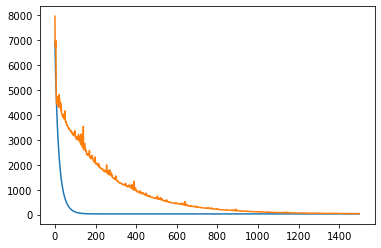

In [175]:
iter_list = np.array(range(max_iter))

#SGD_errors_slice = SGD_errors[0:max_iter]
#print(len(GD_errors))
#print(len(SGD_errors))

plt.plot(iter_list, GD_errors) # plot gd errors with eta=1e-2
plt.plot(iter_list, SGD_errors) # plot sgd errors with eta=1e-3